<a href="https://colab.research.google.com/github/VictorBenoiston/using-keras-tuner/blob/main/2nd_assignment_embedded_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Universidade Fderal Rural Do Semi-Árido
## Mestrado em Engenharia da Computação - PPgCC
## Sistemas embarcados
### Docente: Silvio Fernandes
### Discente: Victor Benoiston Jales de Oliveira
### -> Segunda tarefa prática.

In [15]:
# Installing the dependecies
!pip install keras-tuner --upgrade

In [16]:
import numpy as np
import time
import random

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [57]:
data = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = data.load_data()

In [43]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [44]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [58]:
# x_train = x_train.reshape(-1, 28, 28, 1)/ 255
# x_test = x_test.reshape(-1, 28, 28, 1) / 255
y_train = to_categorical(y_train[:10])
y_test = to_categorical(y_test[:10])
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Tune tanh models
# best_model_tanh = tune_tanh_models()

# # Tune relu models
# best_model_relu = tune_relu_models()

In [59]:
y_train

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
#indice da imagem de digito de exemplo
img = 5

np.set_printoptions(linewidth=200)
print(x_train[img])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 25

     Label of image 5 is: [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 

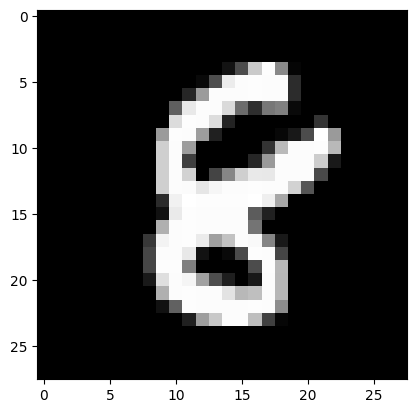

In [32]:
print("     Label of image {} is: {}".format(img, y_train[img]))
plt.imshow(x_train[img], cmap='gray');

In [33]:
x_train.max()

1.5378702e-05

In [34]:
y_train.min()

0.0

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap='binary') # cmap = 'gray'
    plt.xlabel(training_labels[i])

In [ ]:
training_images  = training_images / 255.0
val_images = val_images / 255.0

In [ ]:
print(training_images[3])

In [ ]:
training_images.max()

In [ ]:
plt.imshow(training_images[2]);

# Defining the models.

>### Henceforth, we are going to work with different architectures, thus, the keras-tuner is a handy tool [(Check the documentation)](https://keras.io/keras_tuner/).

> I defined 2 functions, each of them is going to test different architectures with 2 and 3 hidden layers, ne of them for the relu activation funciton, and other one for the tanh. I diveded them, because collab won't stop crashing during the training.

In [22]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

# Define a function for tuning models with tanh activation
def tune_tanh_models(x_train, y_train, x_val, y_val):
    def build_model(hp):
        model = keras.Sequential()
        model.add(keras.layers.Flatten())

        num_hidden_layers = hp.Choice("num_hidden_layers", [2, 3])

        for i in range(num_hidden_layers):
            model.add(
                keras.layers.Dense(
                    units=hp.Choice(f"units_layer_{i}", [10, 20, 30]),
                    activation="tanh",
                )
            )

        model.add(keras.layers.Dense(10, activation="softmax"))

        learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            loss="categorical_crossentropy",
            metrics=["accuracy"],
        )
        return model

    tuner = RandomSearch(
        build_model,
        objective="accuracy",
        max_trials=10,
        directory="tuner_directory",
        project_name="tanh_tuning_project"
    )

    tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

    # Get the best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

    # Build the best model with the best hyperparameters
    best_model = build_model(best_hyperparameters)

    return best_hyperparameters, best_model

# Define a function for tuning models with relu activation
def tune_relu_models(x_train, y_train, x_val, y_val):
    def build_model(hp):
        model = keras.Sequential()
        model.add(keras.layers.Flatten())

        num_hidden_layers = hp.Choice("num_hidden_layers", [2, 3])

        for i in range(num_hidden_layers):
            model.add(
                keras.layers.Dense(
                    units=hp.Choice(f"units_layer_{i}", [10, 20, 30]),
                    activation="relu",
                )
            )

        model.add(keras.layers.Dense(10, activation="softmax"))

        learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            loss="categorical_crossentropy",
            metrics=["accuracy"],
        )
        return model

    tuner = RandomSearch(
        build_model,
        objective="accuracy",
        max_trials=10,
        directory="tuner_directory",
        project_name="relu_tuning_project"
    )

    tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

    # Get the best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

    # Build the best model with the best hyperparameters
    best_model = build_model(best_hyperparameters)

    return best_hyperparameters, best_model

In [27]:
# Example usage:
best_hyperparameters_tanh, best_model_tanh = tune_tanh_models(x_train, y_train, x_val, y_val)
best_hyperparameters_relu, best_model_relu = tune_relu_models(x_train, y_train, x_val, y_val)


In [28]:

# Access and print parameters for the best tanh model
print("Parameters for the Best Tanh Model:")
for layer in best_model_tanh.layers:
    weights = layer.get_weights()
    if weights:
        print(f"Layer: {layer.name}")
        for param in weights:
            print(f"Parameter Shape: {param.shape}")

# Access and print parameters for the best relu model
print("\nParameters for the Best ReLU Model:")
for layer in best_model_relu.layers:
    weights = layer.get_weights()
    if weights:
        print(f"Layer: {layer.name}")
        for param in weights:
            print(f"Parameter Shape: {param.shape}")


Parameters for the Best Tanh Model:

Parameters for the Best ReLU Model:


# conclusion

> The best model had an accuracy of 0.978.